In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [86]:
class regresion_lineal:
    x = []
    y = []
    beta0 = 0
    beta1 = 0
    
    def __init__(self, path, filename):
        
        #############################################
        ## Se carga la informacion en formato .npy ##
        #############################################        
        self.data_array = np.load(path+filename)
        self.df = pd.DataFrame(self.data_array)

        ###########################################################
        ## Se calcula el valor del porcentaje para entrenamiento ##
        ###########################################################
        porcentaje_80 = int(len(self.df) * .80)
                         
        #####################################################
        ## Se crean los dataset de entrenamiento y pruebas ##
        #####################################################
        self.df_entrenamiento = pd.DataFrame(self.df[:porcentaje_80])
        self.df_prueba = pd.DataFrame(self.df[porcentaje_80:])
               
        ######################################################################
        ## Se ejecuta el analisis exploratorio para el set de entrenamiento ##
        ######################################################################
        #self.analisis_exploratorio(self.df_entrenamiento)
        
        #####################################
        ## Se grafican todas las variables ##
        #####################################
        #self.graficaDataFrame(self.df_entrenamiento)

        ##############################################
        ## Se calcula el coeficiente de correlacion ##
        ##############################################
        self.comparaVariables(self.df_entrenamiento)
        
        #########################
        ## Se genera regresion ##
        #########################
        self.regresion(self.df_entrenamiento[0],self.df_entrenamiento[1],int(1),int(2),int(0))
    
    def regresion(self, x, y, epoch, error_int, alpha):
        xdiccionario = {'x':x,'y':1}
        xmatrix = pd.DataFrame(xdiccionario)
        
        ydiccionario = {'x':y,'y':1}
        ymatrix = pd.DataFrame(ydiccionario)
        
        print(xmatrix)
        print(ymatrix)
        
    def comparaVariables(self, df):
        data = self.coeficienteCorrelacionP(df)
        

        for columna in df.columns:
            x = "Valores de: "+str(columna)
            for col in df.columns:
                if(columna != col):
                    y = "Valores de: "+str(col)
                    coeficiente = self.coeficienteCorrelacion(df[columna],df[col])
                    plt.figure()
                    plt.title("Coeficiente Correlacion "+str(coeficiente))
                    plt.xlabel(x)
                    plt.ylabel(y)                
                    plt.scatter(df[columna],df[col])
        
               
    def coeficienteCorrelacionP(self,df): #se calcula coeficiente de correlacion pandas
        return df.corr(method="pearson")
               
        
    def coeficienteCorrelacion(self, dfx, dfy): #Se calculan coeficiente de correlacion numpy
        coeficiente = np.corrcoef(dfx,dfy) [1,0]      
        return coeficiente
        

    def graficaDataFrame(self,df):
        for columna in df.columns:
            plt.figure()
            sns.histplot(df[columna])
    
    def analisis_exploratorio(self,df):        
        print("Media\n",self.media(df))
        print("Maximo\n",self.numeroMaximo(df))
        print("Minimo\n",self.numeroMinimo(df))
        print("Rango\n",self.rango(df))
        print("Desviacion\n",self.desviacionEstandar(df))
            
    def media(self, df):
        return pd.DataFrame.median(df,axis=0)
    
    def numeroMaximo(self,df):
        return pd.DataFrame.max(df,axis=0)
    
    def numeroMinimo(self,df):
        return pd.DataFrame.min(df,axis=0)
    
    def rango(self,arr):
        return np.ptp(arr,axis=0)
    
    def desviacionEstandar(self,df):
        return pd.DataFrame.std(df,axis=0) 

<ipython-input-86-e5d58c52518c>:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


             x  y
0     208500.0  1
1     181500.0  1
2     223500.0  1
3     140000.0  1
4     250000.0  1
...        ... ..
1163  108959.0  1
1164  194000.0  1
1165  233170.0  1
1166  245350.0  1
1167  173000.0  1

[1168 rows x 2 columns]
        x  y
0     7.0  1
1     6.0  1
2     7.0  1
3     7.0  1
4     8.0  1
...   ... ..
1163  4.0  1
1164  5.0  1
1165  7.0  1
1166  8.0  1
1167  6.0  1

[1168 rows x 2 columns]


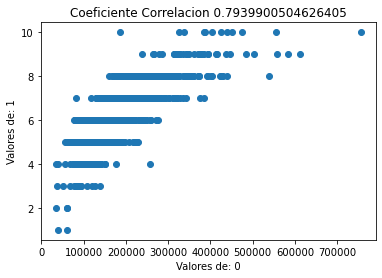

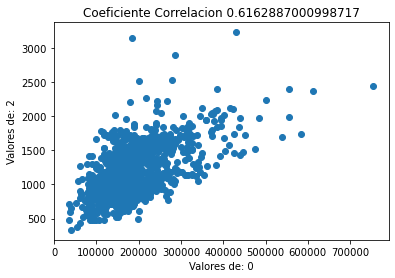

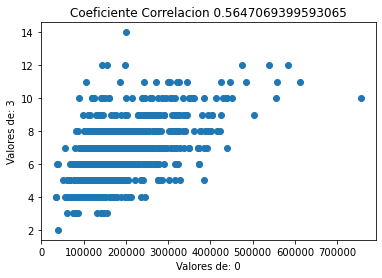

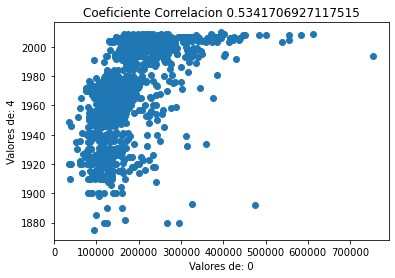

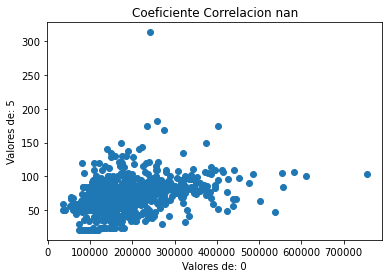

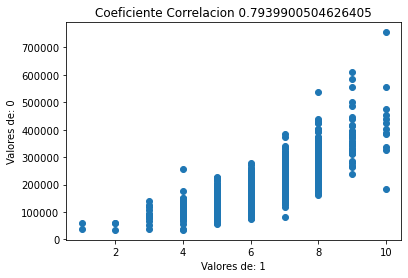

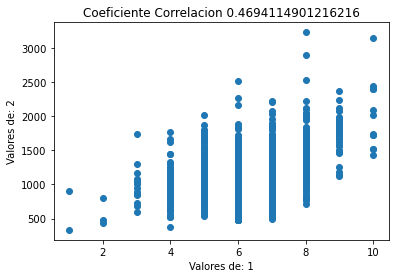

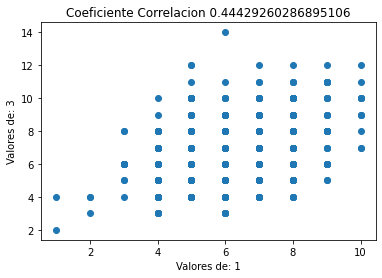

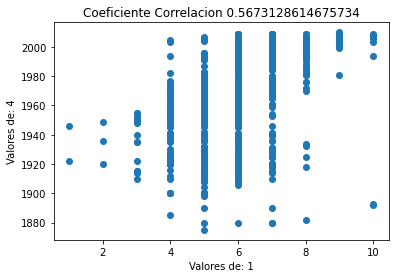

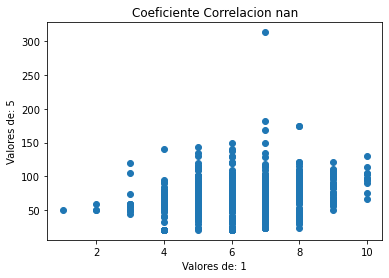

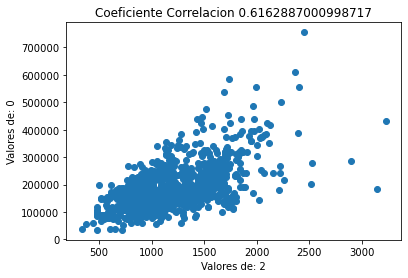

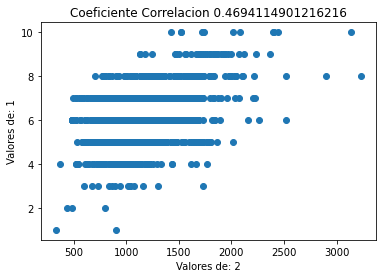

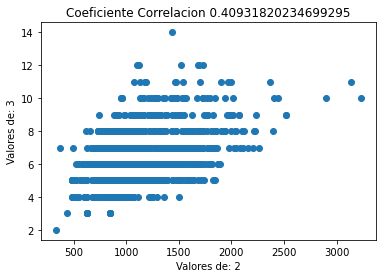

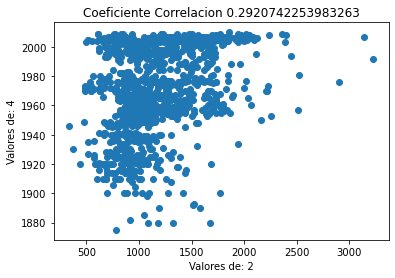

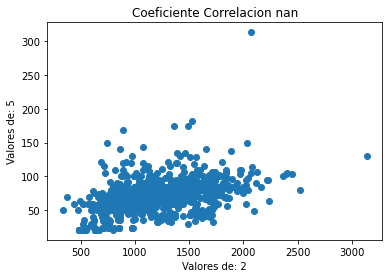

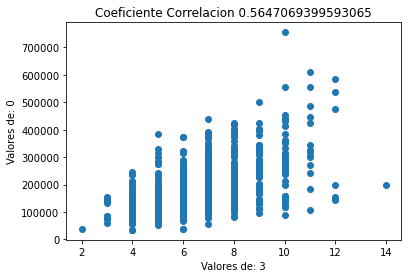

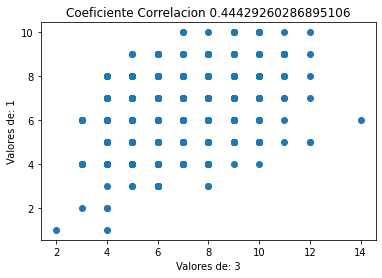

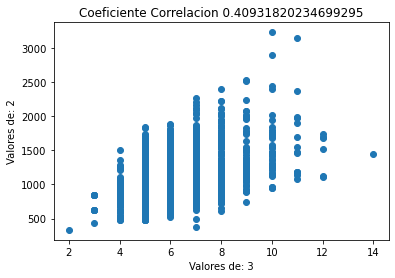

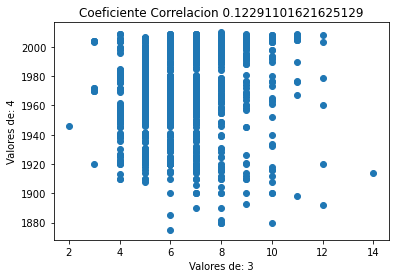

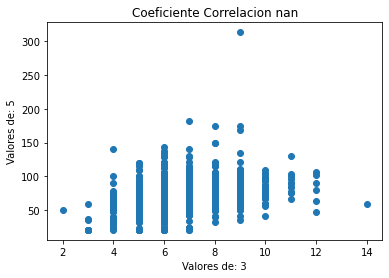

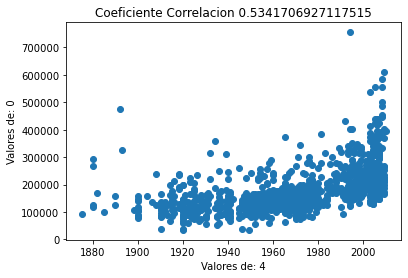

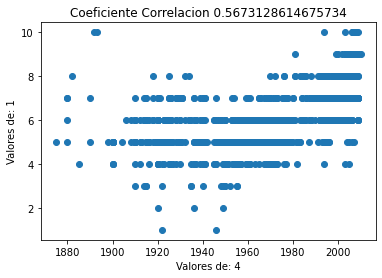

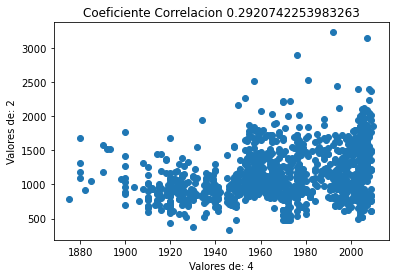

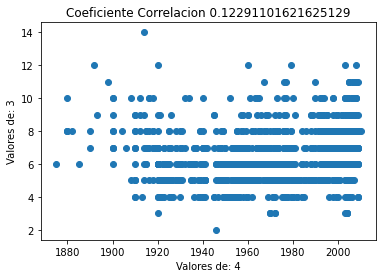

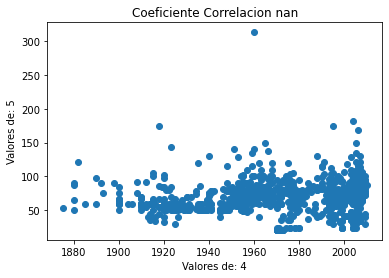

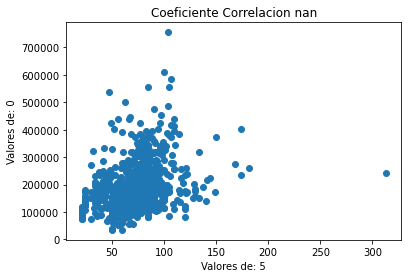

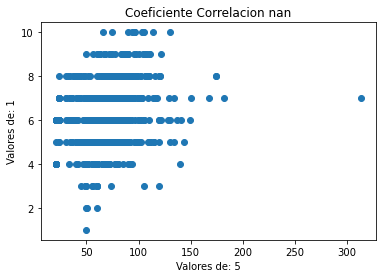

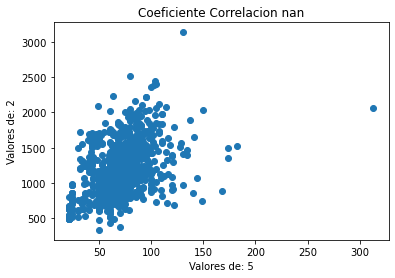

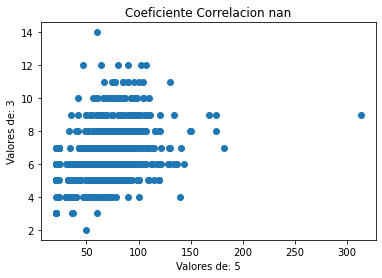

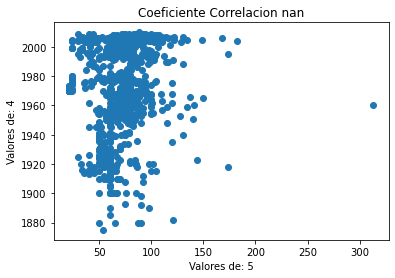

In [87]:
path = "C:\\Users\\Marcela Ambrosio\\OneDrive\\Documentos\\Galileo\\Ciencia de Datos en python\\Proyecto Final\\proyecto_data\\"
file_name = "proyecto_training_data.npy"
pryfinal = regresion_lineal(path,file_name)